<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_05_CV_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Import the necessary libraries
import torch
import torch.nn as nn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Manual Separation for Cross-Validation

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Convert data from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transform species into numbers
labels = torch.zeros(len(data), dtype=torch.long)

# Labels for the species
labels[iris.species == "seosa"] = 0
labels[iris.species == "versicolor"] = 1
labels[iris.species == "virginica"] = 2

In [5]:
data[1:5,:]

tensor([[4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])

In [6]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

### Separate into Train and Test Set

In [7]:
# define the proportion of training set
propTraining = 0.8
nTraining = int(len(labels)*propTraining)

# initialize a boolean vector to select data and their labels
traintestBool = np.zeros(len(labels), dtype=bool)

# One way to select samples
traintestBool[range(nTraining)] = True

traintestBool
# Very bad way, picks almost exclussively the last category

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

In [10]:
# Test data balance
# remember, data were labeled as 0, 1 and 2. Average always expected to be 1
print("Average of full data")
print(torch.mean(labels.float()))
print()

print("Average of Training Data")
print(torch.mean(labels[traintestBool].float()))
print()

print("Average of Test Data")
print(torch.mean(labels[~traintestBool].float()))

Average of full data
tensor(1.)

Average of Training Data
tensor(0.7500)

Average of Test Data
tensor(2.)


In [13]:
# A better way to separate the dataset
traintestBool = np.zeros(len(labels), dtype=bool)
items2use4train = np.random.choice(range(len(labels)),nTraining, replace=False)
traintestBool[items2use4train] = True
traintestBool

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False, False,  True, False, False,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,

In [14]:
# Now check the balance
print("Average of full data")
print(torch.mean(labels.float()))
print()

print("Average of Training Data")
print(torch.mean(labels[traintestBool].float()))
print()

print("Average of Test Data")
print(torch.mean(labels[~traintestBool].float()))

Average of full data
tensor(1.)

Average of Training Data
tensor(1.0167)

Average of Test Data
tensor(0.9333)


In [15]:
# Create the ANN Model
ANNiris = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3),
    )

# loss function
lossfun = nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

In [17]:
# Check data shape
# Entire dataset
print(data.shape)
print()

# Training Data
print(data[traintestBool,:].shape)
print()

# test set
print(data[~traintestBool, :].shape)

torch.Size([150, 4])

torch.Size([120, 4])

torch.Size([30, 4])


In [20]:
# Train the model
numepochs = 1000

losses = torch.zeros(numepochs)
ongoingAcc = []

for epochi in range(numepochs):

    # forwad pass
    yHat = ANNiris(data[traintestBool,:])

    # Copute accuracy
    ongoingAcc.append(100*torch.mean((
        torch.argmax(yHat,axis=1) == labels[traintestBool]).float()))
    
    # Compute loss
    loss = lossfun(yHat, labels[traintestBool])
    losses[epochi] = loss

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [21]:
# Compute train and test accuracies

# Final forward pass using training data
predictions = ANNiris(data[traintestBool,:])
trainacc = 100*torch.mean((torch.argmax(predictions,axis=1)==labels[traintestBool]).float())

# Final forward pass using test data
predictions = ANNiris(data[~traintestBool,:])
testacc = 100*torch.mean((torch.argmax(predictions,axis=1)==labels[~traintestBool]).float())

In [23]:
print("Final train accuracy is {:.3f}%".format(trainacc))
print()
print("Final test accuracy is {:.3f}%".format(testacc))

Final train accuracy is 98.333%

Final test accuracy is 93.333%


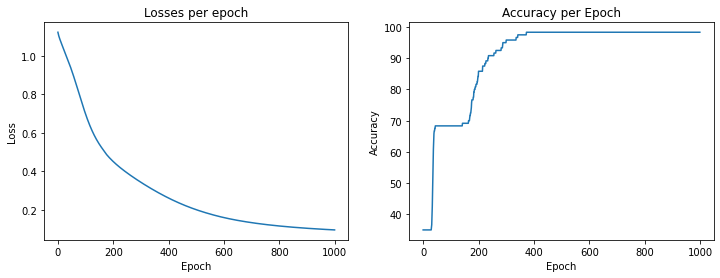

In [29]:
# Loss by epoch
fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_title("Losses per epoch")

ax[1].plot(ongoingAcc)
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_title("Accuracy per Epoch")

plt.show()